In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
import yfinance as yf # to get finamcial data from web
tsla = yf.Ticker('TSLA')


In [12]:
# get historical data as hist
hist = tsla.history(period="4y")

In [13]:
# Save dataframe as CSV file
hist.to_csv('TSLA.csv')

In [15]:
stock_data= pd.read_csv('TSLA.csv')
stock_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1001,2023-06-22 00:00:00-04:00,250.770004,265.000000,248.250000,264.609985,166875900,0.0,0.0
1002,2023-06-23 00:00:00-04:00,259.290009,262.450012,252.800003,256.600006,176584100,0.0,0.0
1003,2023-06-26 00:00:00-04:00,250.070007,258.369995,240.699997,241.050003,179990600,0.0,0.0
1004,2023-06-27 00:00:00-04:00,243.240005,250.389999,240.850006,250.210007,164968200,0.0,0.0
1005,2023-06-28 00:00:00-04:00,249.699997,259.880005,248.889999,256.239990,159148200,0.0,0.0


In [16]:
stock_data = stock_data[['Date','Close']] 

In [17]:
stock_data.head()

,Date,Close
0,2019-07-01 00:00:00-04:00,15.144667
1,2019-07-02 00:00:00-04:00,14.970000
2,2019-07-03 00:00:00-04:00,15.660000
3,2019-07-05 00:00:00-04:00,15.540000
4,2019-07-08 00:00:00-04:00,15.356000


In [18]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1006 non-null   object 
 1   Close   1006 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [19]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"],utc=True) # convert Date data type ('object') to datetime


In [20]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    1006 non-null   datetime64[ns, UTC]
 1   Close   1006 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 15.8 KB


In [21]:
stock_data

,Date,Close
0,2019-07-01 04:00:00+00:00,15.144667
1,2019-07-02 04:00:00+00:00,14.970000
2,2019-07-03 04:00:00+00:00,15.660000
3,2019-07-05 04:00:00+00:00,15.540000
4,2019-07-08 04:00:00+00:00,15.356000
...,...,...
1001,2023-06-22 04:00:00+00:00,264.609985
1002,2023-06-23 04:00:00+00:00,256.600006
1003,2023-06-26 04:00:00+00:00,241.050003
1004,2023-06-27 04:00:00+00:00,250.210007


In [22]:
stock_data = stock_data.set_index("Date") # setting date as index

In [23]:
stock_data.head(5) 

,Close
Date,
2019-07-01 04:00:00+00:00,15.144667
2019-07-02 04:00:00+00:00,14.970000
2019-07-03 04:00:00+00:00,15.660000
2019-07-05 04:00:00+00:00,15.540000
2019-07-08 04:00:00+00:00,15.356000


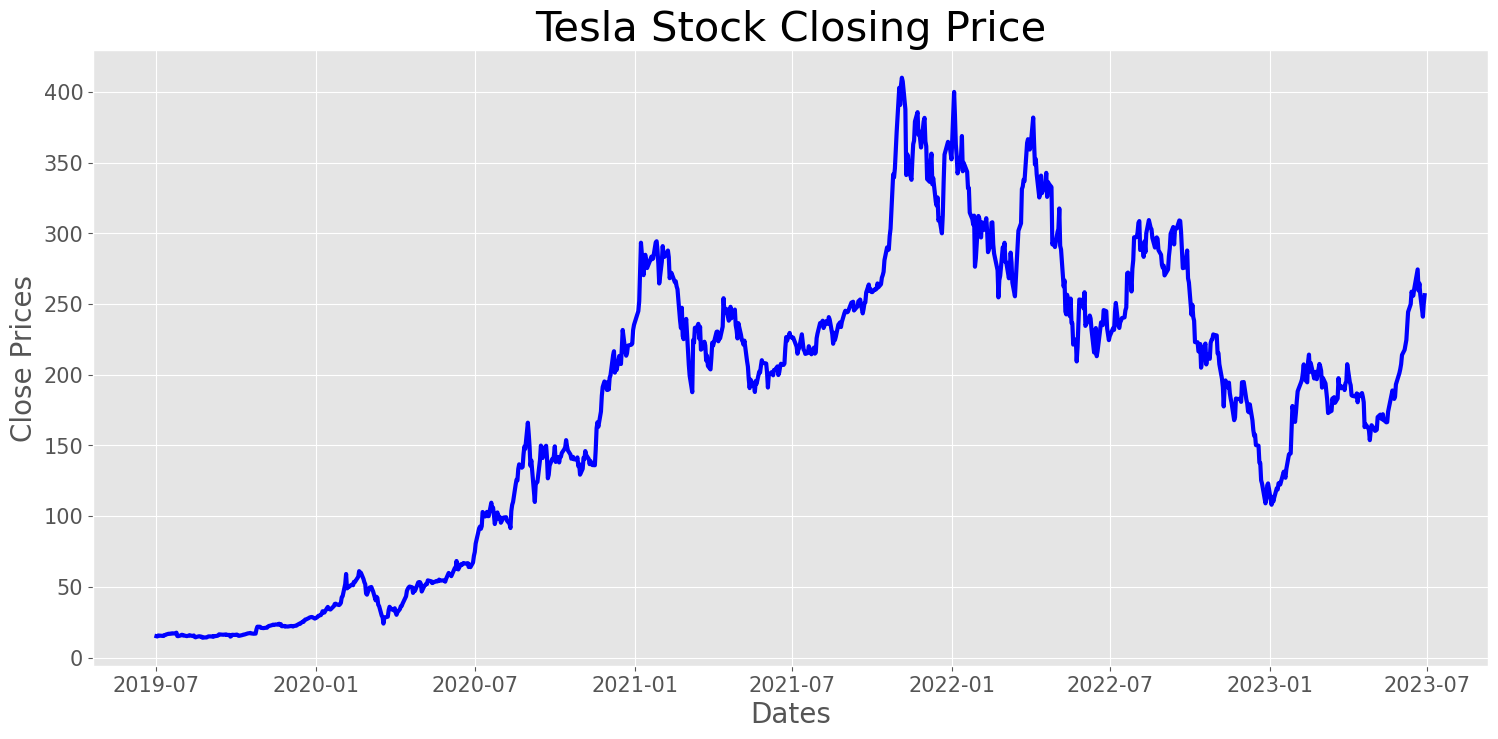

In [24]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

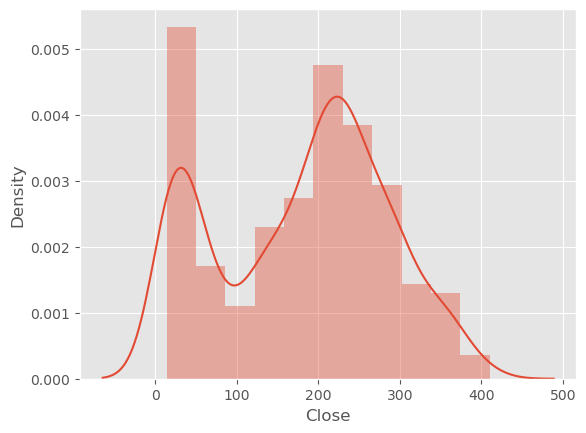

In [25]:
import seaborn as sns
sns.distplot(stock_data['Close'])

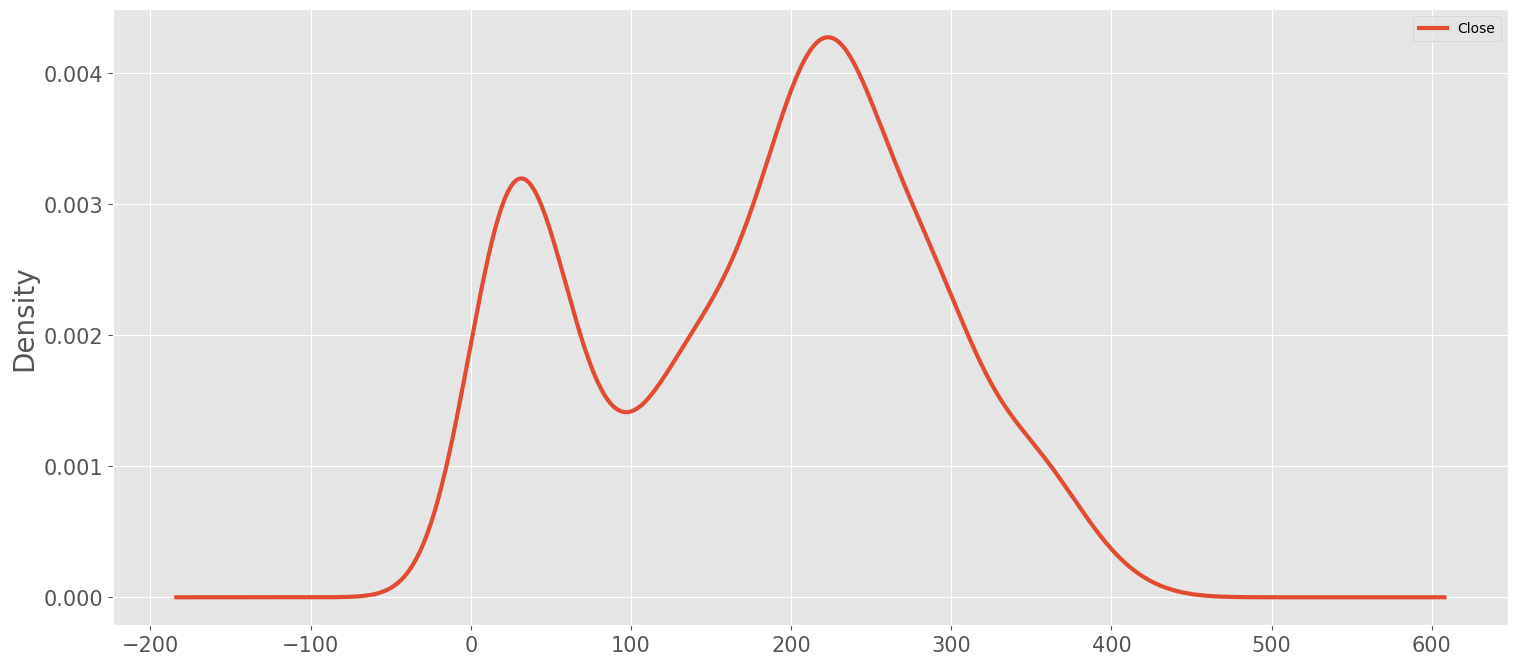

In [26]:
stock_data.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

## Check for stationarity

Time series analysis only works with stationary data, so we must first determine **whether a series is stationary.**
Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is stationary.

**What does it mean for data to be stationary?**

- The mean of the series should not be a function of time. Because the mean increases over time, the red graph below is not stationary.

<img src="https://imgur.com/LjtBXwf.png">
- The variance of the series should not be a function of time. Homoscedasticity is the term for this characteristic. The varying spread of data over time can be seen in the red graph.

<img src="https://imgur.com/v2Uye7X.png">

- Finally, neither the I th term nor the (I + m) th term's covariance should be a function of time. As you can see in the graph below, the spread gets less as time goes on. As a result, the'red series' covariance does not remain constant throughout time.

<img src="https://i.imgur.com/6HVlvg2.png">

<hr style="border:1px solid black"> </hr>

### ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most extensively used statistical tests. It can be used to establish whether a series has a unit root and, as a result, whether the series is stationary. The null and alternate hypotheses for this test are:
Distinguish between point to point links and multi point links
**Null Hypothesis**: The series has a unit root (a =1).

**Alternative Hypothesis**: There is no unit root in the series.

The series is considered to be non-stationary if the null hypothesis is not rejected. As a result, the series can be linear or difference stationary.
If both the mean and standard deviation are flat lines, the series becomes stationary (constant mean and constant variance).

In [27]:
np.mean(stock_data['Close'].head(12))

15.908111095428467

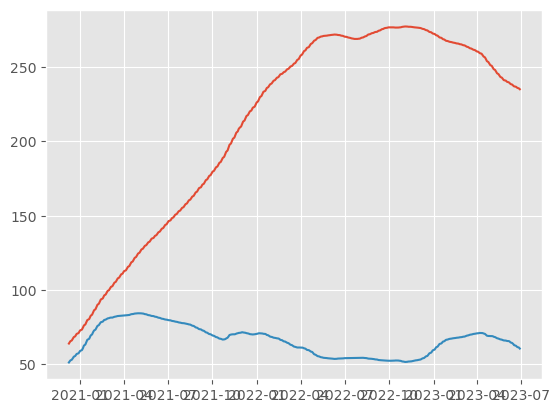

In [28]:
plt.plot(stock_data['Close'].rolling(365).mean())
plt.plot(stock_data['Close'].rolling(365).std() )

In [29]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [30]:
from statsmodels.tsa.stattools import adfuller
adfuller(stock_data['Close'],autolag='AIC')

(-1.7500974012418709,
 0.40550296536823294,
 10,
 995,
 {'1%': -3.4369391965679257,
  '5%': -2.86444914142694,
  '10%': -2.5683189679553546},
 6926.620302603364)

<hr style="border:1px solid black"> </hr>
We can't reject the Null hypothesis because the p-value is greater than 0.05. Furthermore, the test statistics exceed the critical values. As a result, the data is not stationary.

Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model.
So, to make the data stationary, we need to take the first-order difference of the data. Which is just another way of saying, subtract today’s close price from yesterday’s close price.


In [31]:
stock_data['Close_diff_1']=stock_data['Close'].diff()

In [32]:
stock_data['Close_diff_1']

Date
2019-07-01 04:00:00+00:00          NaN
2019-07-02 04:00:00+00:00    -0.174666
2019-07-03 04:00:00+00:00     0.690000
2019-07-05 04:00:00+00:00    -0.120000
2019-07-08 04:00:00+00:00    -0.184000
                               ...    
2023-06-22 04:00:00+00:00     5.149994
2023-06-23 04:00:00+00:00    -8.009979
2023-06-26 04:00:00+00:00   -15.550003
2023-06-27 04:00:00+00:00     9.160004
2023-06-28 04:00:00+00:00     6.029984
Name: Close_diff_1, Length: 1006, dtype: float64

In [33]:
stock_data.dropna(inplace=True)

In [34]:
stock_data['Close_diff_1']

Date
2019-07-02 04:00:00+00:00    -0.174666
2019-07-03 04:00:00+00:00     0.690000
2019-07-05 04:00:00+00:00    -0.120000
2019-07-08 04:00:00+00:00    -0.184000
2019-07-09 04:00:00+00:00    -0.018667
                               ...    
2023-06-22 04:00:00+00:00     5.149994
2023-06-23 04:00:00+00:00    -8.009979
2023-06-26 04:00:00+00:00   -15.550003
2023-06-27 04:00:00+00:00     9.160004
2023-06-28 04:00:00+00:00     6.029984
Name: Close_diff_1, Length: 1005, dtype: float64

### do differencing until it converts into stationary data where mean and variance are constant


In [35]:
adfuller(stock_data['Close_diff_1'],autolag='AIC')

(-9.212097865021793,
 1.8757596380626282e-15,
 9,
 995,
 {'1%': -3.4369391965679257,
  '5%': -2.86444914142694,
  '10%': -2.5683189679553546},
 6921.841635152401)

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data["Close"],period=30)

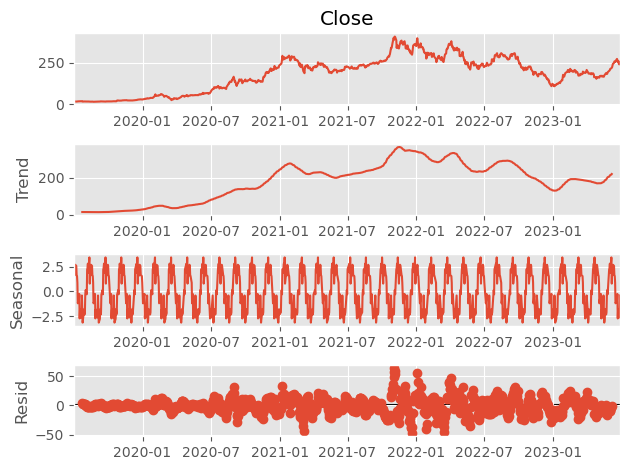

In [38]:
result.plot();

# Differencing
## First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.

<AxesSubplot:title={'center':'FIRST ORDER DIFFERENCE'}, xlabel='Date'>

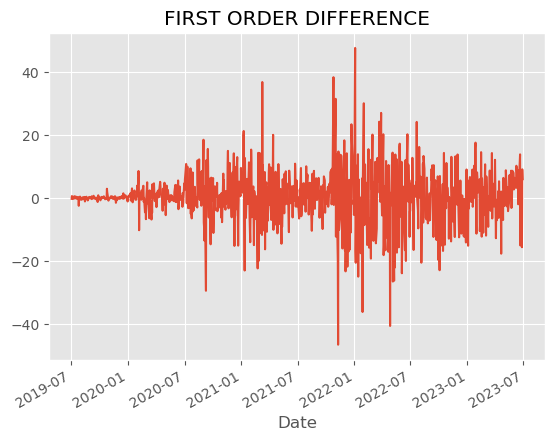

In [41]:
stock_data['Close_diff_1'].plot(title="FIRST ORDER DIFFERENCE")

<AxesSubplot:xlabel='Date'>

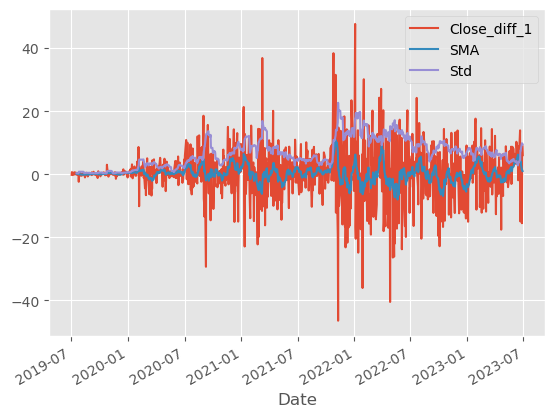

In [42]:
# Simple Moving Average - 12 months period
stock_data['SMA'] = stock_data['Close_diff_1'].rolling(window=12).mean()
# Simple Moving Standard deviation - 12 months perios
stock_data['Std'] = stock_data['Close_diff_1'].rolling(window=12).std()

stock_data[['Close_diff_1','SMA','Std']].plot()

# Augmented Dickey-Fuller Test
To determine stationarity of a time series data; ie. to find whether a data is stationary or not and also to find optimum value for order of differentiation required.

In [43]:
from statsmodels.tsa.stattools import adfuller

print('Augmented Dickey-Fuller Test on Tesla Data :-')
dftest = adfuller(stock_data['Close_diff_1'].dropna(), autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Tesla Data :-


(-9.212097865021793,
 1.8757596380626282e-15,
 9,
 995,
 {'1%': -3.4369391965679257,
  '5%': -2.86444914142694,
  '10%': -2.5683189679553546},
 6921.841635152401)

In [44]:
print('Augmented Dickey-Fuller Test on Airline Data :- ')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

print(dfout)

Augmented Dickey-Fuller Test on Airline Data :- 
ADF test statistic     -9.212098e+00
p-value                 1.875760e-15
# lags used             9.000000e+00
# observations          9.950000e+02
critical value (1%)    -3.436939e+00
critical value (5%)    -2.864449e+00
critical value (10%)   -2.568319e+00
dtype: float64


p-value < 0.05 will indicate the data is stationary. 

# ACF and PACF
Autocorrelation Function / Partial Autocorrelation Function

## ACF Plots
Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about a time series.


In [45]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf(stock_data['Close'])

array([1.        , 0.99543833, 0.99115815, 0.98683053, 0.98235313,
       0.97750576, 0.97276267, 0.96791087, 0.96257175, 0.95763737,
       0.9521278 , 0.9469251 , 0.94183063, 0.93657481, 0.93131782,
       0.9264224 , 0.9216778 , 0.91693878, 0.91247696, 0.90746622,
       0.90252987, 0.89779387, 0.89310476, 0.88868839, 0.88461538,
       0.87978593, 0.87479834, 0.86991467, 0.86541439, 0.86116269,
       0.85693911])

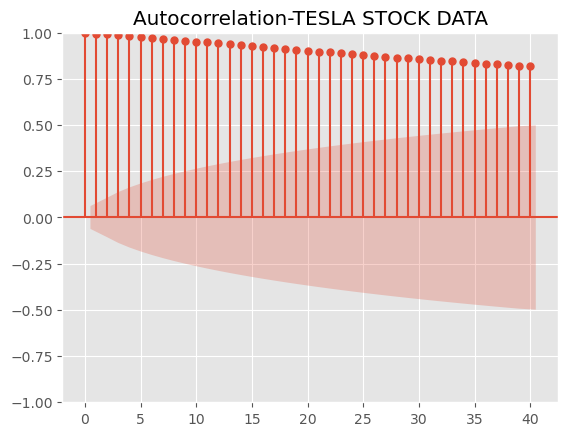

In [49]:
plot_acf(stock_data['Close'].dropna(), title='Autocorrelation-TESLA STOCK DATA', lags=40);

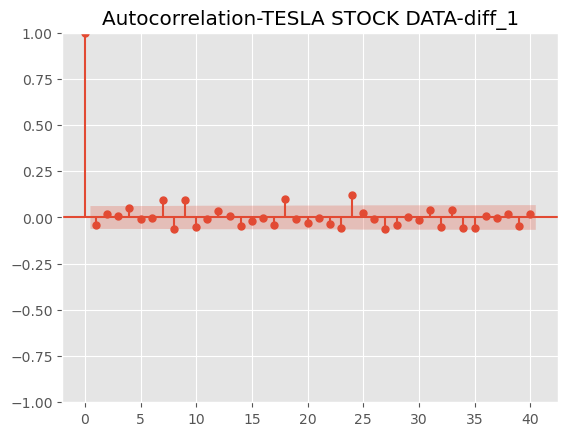

In [51]:
plot_acf(stock_data['Close_diff_1'].dropna(), title='Autocorrelation-TESLA STOCK DATA-diff_1', lags=40);

'q' will be the line number that comes just before the first inverted line from the above graph. 
\
The line numbering starts from 0. In our case, Line 6 is the first inverted line. Hence, Line 1 will be the q. Therefore, q = 1.

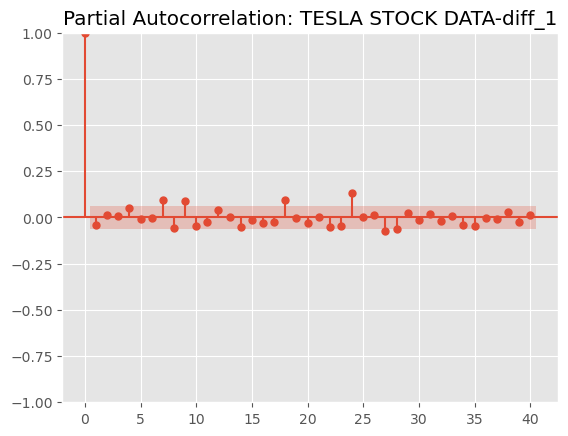

In [52]:
plot_pacf(stock_data['Close_diff_1'].dropna(), title='Partial Autocorrelation: TESLA STOCK DATA-diff_1', lags=40);

'p' will also be the line number that comes just before the first inverted line from the above graph. 
\
The line numbering starts from 0. In our case, Line 2 is the first inverted line. Hence, Line 1 will be the p. Therefore, p = 1.

'd' value will be the number of times we differentiate the dataset to make the mean constant. In our case, we differentiated only once. Hence, d = 1

# ARIMA


**AR(p)** Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.

**I(d)** Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary.


From the above, \
AR I MA \
p &nbsp;  d &nbsp; q \
1 &nbsp; 1 &nbsp; 1

Let's find the recommended p,d,q values using pmdarima Auto-ARIMA.

In [54]:
!pip3 install arch yfinance pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [55]:
from pmdarima import auto_arima

In [56]:
stepwise_fit = auto_arima(stock_data['Close'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=9547.449, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=7285.912, Time=2.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=8667.193, Time=2.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=9555.040, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7611.634, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=7216.735, Time=4.81 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=12.16 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.49 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=9549.646, Time=1.01 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=7218.711, Time=5.78 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=7218.713, Time=5.83 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=8669.755, Time=4.78 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=7219.800, Time=8.86 sec
 ARIMA(1,0,0)(2,1,0)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1005
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -3603.614
Date:                            Thu, 29 Jun 2023   AIC                           7215.229
Time:                                    09:39:10   BIC                           7234.832
Sample:                                         0   HQIC                          7222.682
                                           - 1005                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9701      0.006    170.206      0.000       0.959       0.981
ar.S.L12      -0.6822      0.028    -24.089      0.000      -0.738      -0.627
ar.S.L24      -0.2638      0.027     -9.623      0.000      -0.318      -0.210
sigma2        82.4635      2.175     37.922      0.000      78.201      86.726
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               793.35
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               5.75   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This shows a recommended (p,d,q) ARIMA Order of (1,0,0)

We can see how this was determined by looking at the stepwise results. The recommended order is the one with the lowest <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> or AIC score. Note that the recommended model may <em>not</em> be the one with the closest fit. The AIC score takes complexity into account, and tries to identify the best <em>forecasting</em> model.

\
**AIC / BIC**

# Prediction for the next 1 years

In [58]:
stock_data.shape

(1005, 4)

In [59]:
train = stock_data.iloc[:750]
test = stock_data[750:]
test

,Close,Close_diff_1,SMA,Std
Date,,,,
2022-06-23 04:00:00+00:00,235.070007,-1.016663,-0.267499,11.023445
2022-06-24 04:00:00+00:00,245.706665,10.636658,0.568333,11.467079
2022-06-27 04:00:00+00:00,244.919998,-0.786667,0.254444,11.446597
2022-06-28 04:00:00+00:00,232.663330,-12.256668,-0.586945,11.998006
2022-06-29 04:00:00+00:00,228.490005,-4.173325,-0.311666,11.862692
...,...,...,...,...
2023-06-22 04:00:00+00:00,264.609985,5.149994,3.916665,7.484460
2023-06-23 04:00:00+00:00,256.600006,-8.009979,2.940834,8.240474
2023-06-26 04:00:00+00:00,241.050003,-15.550003,1.373333,9.813182


In [60]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [61]:
model = ARIMA(stock_data['Close'], order=(1,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1005
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3535.830
Date:                Thu, 29 Jun 2023   AIC                           7077.659
Time:                        09:46:42   BIC                           7092.397
Sample:                             0   HQIC                          7083.259
                               - 1005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.0719     57.926      3.109      0.002      66.539     293.605
ar.L1          0.9973      0.002    501.104      0.000       0.993       1.001
sigma2        66.2497      1.625     40.772      0.000      63.065      69.434
===================================================================================
Ljung-Box (L1) (Q):                   1.46   Jarque-Bera (JB):               907.23
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               5.60   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
#obtain predicted values
predictions = results.predict(start=len(train), end=len(stock_data)-1, typ='levels')

In [63]:

for i in range(len(predictions)):
    print(f"predicted = {predictions[i]}, expected = {test['Close'][i]}")

predicted = 235.93340741895088, expected = 235.07000732421875
predicted = 234.9195265195334, expected = 245.7066650390625
predicted = 245.527081194588, expected = 244.9199981689453
predicted = 244.7425667296563, expected = 232.663330078125
predicted = 232.51943420129294, expected = 228.4900054931641
predicted = 228.35752828135875, expected = 224.47332763671875
predicted = 224.35184048763892, expected = 227.26333618164065
predicted = 227.13421526903554, expected = 233.0666656494141
predicted = 232.92166620306855, expected = 231.73333740234372
predicted = 231.59198608552035, expected = 244.5433349609375
predicted = 244.36693411270664, expected = 250.76333618164065
predicted = 250.56991674092825, expected = 234.3433380126953
predicted = 234.19484545342067, expected = 233.07000732421875
predicted = 232.92499873469146, expected = 237.0399932861328
predicted = 236.88412238792648, expected = 238.31333923339844
predicted = 238.15398432369506, expected = 240.0666656494141
predicted = 239.902513

<AxesSubplot:xlabel='Date'>

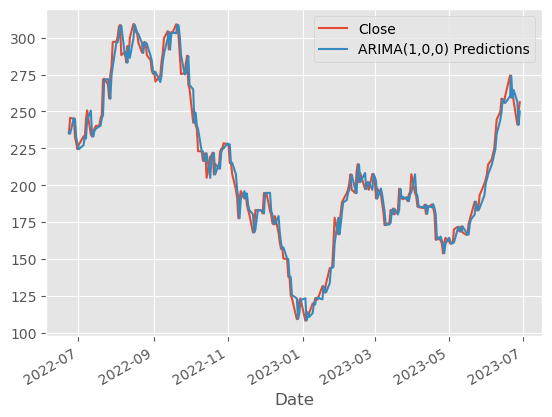

In [87]:
# plot predicted vs observed (test data)
test['Close'].plot(legend=True)
predictions.rename('ARIMA(1,0,0) Predictions').plot(legend=True)

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:

MSE = mean_squared_error(test['Close'], predictions)
print('ARIMA(1,0,0) MSE error : ', MSE)

ARIMA(1,0,0) MSE error :  58.32260161313668


In [67]:
# RMSE - root mean squared error
RMSE = MSE**(1/2)
print('ARIMA(0,1,1) RMSE error : ', RMSE)

ARIMA(0,1,1) RMSE error :  7.636923569942067


Re-train the ARIMA model on full data and forecast the future

In [70]:
model = ARIMA(stock_data['Close'], order=(1,0,0))
results = model.fit()

In [113]:
forecast = results.predict(start=len(stock_data), end=len(stock_data)+(12*1))

<AxesSubplot:xlabel='Date'>

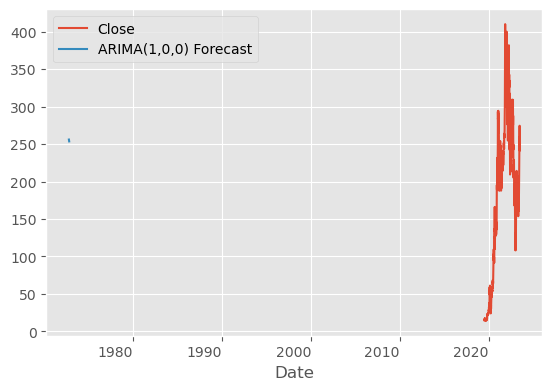

In [114]:
stock_data['Close'].plot(legend=True)

forecast.rename('ARIMA(1,0,0) Forecast').plot(legend=True)

<AxesSubplot:>

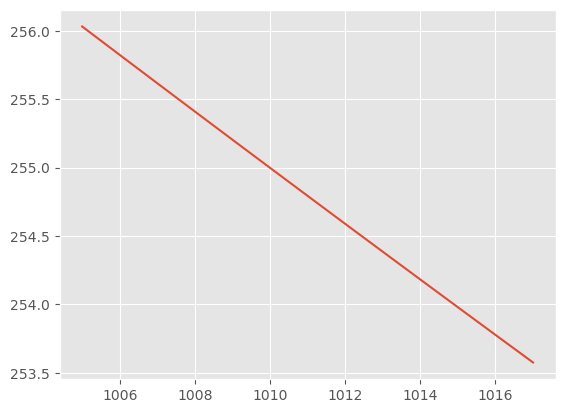

In [108]:
results.predict(start=len(stock_data), end=len(stock_data)+(12*1)).plot()

In [112]:
stock_data

,Close,Close_diff_1,SMA,Std
Date,,,,
2019-07-02 04:00:00+00:00,14.970000,-0.174666,NaN,NaN
2019-07-03 04:00:00+00:00,15.660000,0.690000,NaN,NaN
2019-07-05 04:00:00+00:00,15.540000,-0.120000,NaN,NaN
2019-07-08 04:00:00+00:00,15.356000,-0.184000,NaN,NaN
2019-07-09 04:00:00+00:00,15.337333,-0.018667,NaN,NaN
...,...,...,...,...
2023-06-22 04:00:00+00:00,264.609985,5.149994,3.916665,7.484460
2023-06-23 04:00:00+00:00,256.600006,-8.009979,2.940834,8.240474
2023-06-26 04:00:00+00:00,241.050003,-15.550003,1.373333,9.813182
